# face_mask_detection

**Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
from glob import glob 
import random 
import os
import cv2
import tensorflow as tf
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


from IPython.display  import SVG, Image

print("Tensorflow version:",tf.__version__)

Tensorflow version: 2.19.0


**Exploring the dataset**

In [2]:
image_paths = glob("data/**/*.jpg", recursive=True) + \
              glob("data/**/*.jpeg", recursive=True) + \
              glob("data/**/*.png", recursive=True)

print("Current Directory:", os.getcwd())
print("Images found:", len(image_paths))

if not image_paths:
    raise ValueError("No images found! Check folder paths and image extensions.")

Current Directory: C:\Users\acer\OneDrive\Desktop\Face mask detection with live alert system
Images found: 7553


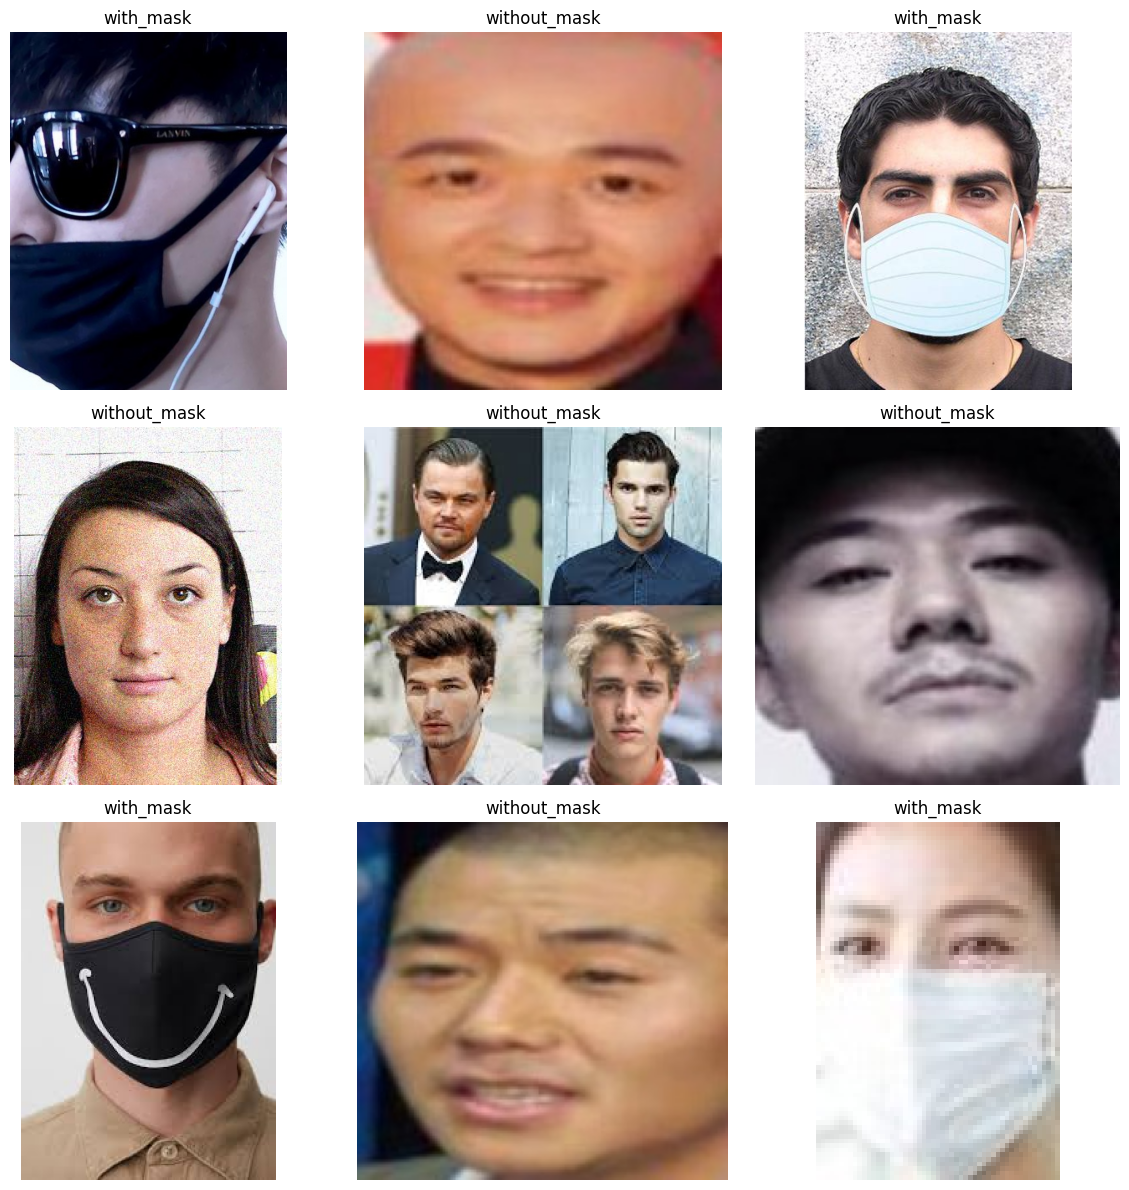

In [3]:
plt.figure(figsize=(12, 12))
for i in range(9):
    image = random.choice(image_paths)
    img = cv2.imread(image)

    if img is None:
        print("Failed to read image:", image)
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(os.path.dirname(image)))
    plt.axis('off')
plt.tight_layout()
plt.show()

**Preparing for model training**

In [4]:
data_dir = "data/"  
img_size = 100
batch_size = 32
epochs = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

# Training data
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Validation data
val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)   

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [5]:
model = Sequential([
    Input(shape=(100, 100, 3)),  

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.5),  

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

**Training the model**

In [6]:
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = val_data.n // val_data.batch_size


In [7]:
history = model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_data,
    validation_steps=validation_steps
)

C:\Users\acer\anaconda3\envs\tf2\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 88/188 ━━━━━━━━━━━━━━━━━━━━ 1:28 882ms/step - accuracy: 0.7795 - loss: 0.5701

C:\Users\acer\anaconda3\envs\tf2\lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.8124 - loss: 0.4794

C:\Users\acer\anaconda3\envs\tf2\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 189s 971ms/step - accuracy: 0.8126 - loss: 0.4788 - val_accuracy: 0.5133 - val_loss: 1.0268
Epoch 2/10
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2:08 687ms/step - accuracy: 0.8125 - loss: 0.3754

C:\Users\acer\anaconda3\envs\tf2\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.8125 - loss: 0.3754 - val_accuracy: 0.5120 - val_loss: 1.0326
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 179s 954ms/step - accuracy: 0.9002 - loss: 0.2459 - val_accuracy: 0.7699 - val_loss: 0.4600
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.8750 - loss: 0.3284 - val_accuracy: 0.7699 - val_loss: 0.4763
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 177s 943ms/step - accuracy: 0.9183 - loss: 0.2120 - val_accuracy: 0.8670 - val_loss: 0.3081
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.9375 - loss: 0.1406 - val_accuracy: 0.8750 - val_loss: 0.2890
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 182s 971ms/step - accuracy: 0.9310 - loss: 0.1799 - val_accuracy: 0.9269 - val_loss: 0.1989
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.9375 - loss: 0.2030 - val_accuracy: 0.9056 - val_loss: 0.2319
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 177s 939ms/step - accuracy: 0.9474 - loss: 0.1413 - val

**Model evaluation**

In [11]:
model.evaluate(val_data)

48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 292ms/step - accuracy: 0.9036 - loss: 0.2412


[0.24488452076911926, 0.9033112525939941]

**Plotting loss curve**

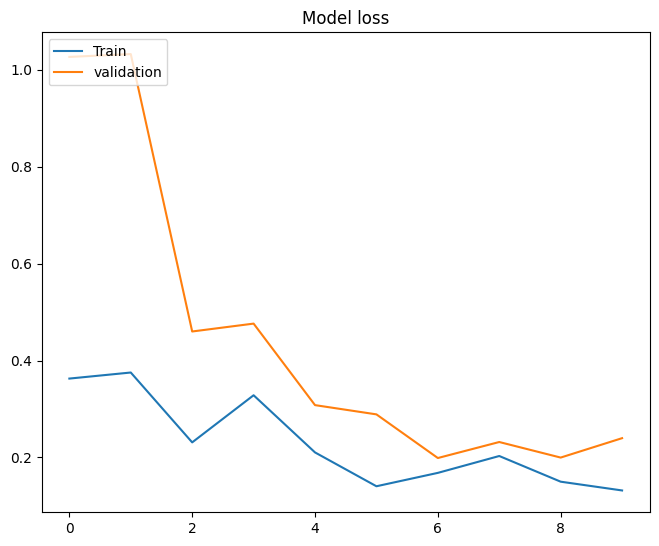

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train','validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)


Text(0.5, 1.0, 'Model accuracy')

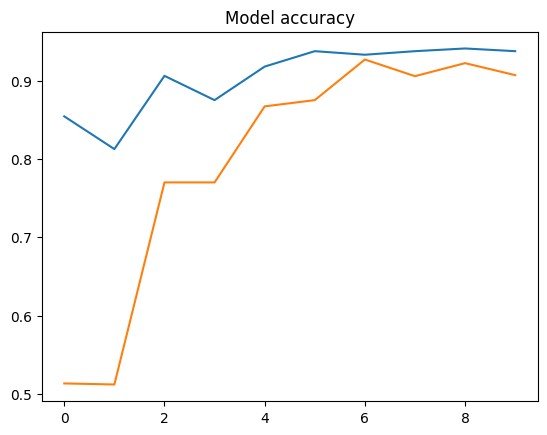

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')

**Saving model**

In [10]:
model_json = model.to_json()
with open("model_a1.json","w") as json_file:
    json_file.write(model_json)